# Traitement du Signal - TP2 : Corrélation de signaux

---
Dans ce deuxième TP, nous allons implémenter la fonction de corrélation entre deux signaux, la tester sur plusieurs signaux, analyser les résultats en fonction des entrées, et créer notre propre Shazam. Sympa comme programme je trouve, donc on y va dès maintenant !

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exercice 1 : Commençons par développer la fonction...

L'intercorrélation compare un signal x(t) et un signal y(t) retardée. Elle mesure la similitude entre ces deux signaux. La formule de l'intercorrélation des signaux f et g est la suivante :

\begin{equation*}
C_{fg}(\tau) = \int_{-\infty}^{\infty} f(t) g^{*}(t - \tau) \, dt
\end{equation*}

Avec $g^{*}$ le conjugué complexe de $g$.

Dans notre cas, nous avons des signaux discrets (non continus, il y'a un échantillonage), donc le calcul de l'intercorrélation devient :

\begin{equation*}
C_{fg}(\tau) = \sum_n f(n + \tau) \cdot g^{*}(n) \cdot T_e
\end{equation*}

Il faut faire attention au recouvrement entre les deux signaux : plus le retard $\tau$ est important, plus le recouvrement entre les deux signaux est faible. $T_e$ représente ici le temps d'échantillonage.

On va coder la fonction à la main, pas à pas. Tout d'abord, créez une fonction de padding. Le padding consiste à augmenter la taille d'un tableau/vecteur aux dimensions souhaitées en rajoutant des zéros pour compléter. Ici, nous voulons simplement rallonger la taille d'un signal, donc ajouter des zéros à la fin pour avoir la même longueur. Votre fonction prendra en entrée un signal de taille $N$, ainsi qu'une taille $M$ (entier). Si $M$>$N$, alors la fonction renverra le signal avec des zéros ajoutés à la fin du ce dernier pour qu'il ait une taille $M$. Dans le cas inverse, la fonction renverra le signal original.

In [2]:
# A compléter
# Développement de la fonction de padding
def padding(signal,M):
    """
    Fonction de padding du signal pour l'agrandir à la taille M (si M supérieur à len(signal))
    signal : tableau 1D Numpy, représentant un signal
    M : entier, représentat la taille de padding attendue pour M
    """
    if M<=len(signal):
        return signal
    out = np.zeros((M),dtype=signal.dtype)
    out[:len(signal)] = signal
    return out

Afin de savoir si votre fonction est correcte, voici quelques tests unitaires. Si un test ne passe pas, ça ne sert à rien d'aller à la suite du TP, validez d'abord votre fonction de padding !

In [3]:
# Tests unitaires de la fonction de padding
x = np.array([1,3,7,2,5,6,6,8,1])
print(f"Padding de x avec M = 15 : {'OK' if ((len(padding(x,15))==15) & (padding(x,15)==np.array([1,3,7,2,5,6,6,8,1,0,0,0,0,0,0]))).all() else 'KO'}")
print(f"Padding de x avec M = 1 (aucun padding attendu) : {'OK' if ((len(padding(x,1))==len(x)) & (padding(x,1)==x).all()) else 'KO'}")
print(f"Padding de x avec M = len(x) (aucun padding attendu) : {'OK' if ((len(padding(x,len(x)))==len(x)) & (padding(x,len(x))==x).all()) else 'KO'}")

Padding de x avec M = 15 : OK
Padding de x avec M = 1 (aucun padding attendu) : OK
Padding de x avec M = len(x) (aucun padding attendu) : OK


Développez maintenant une fonction qui effectue un décalage temporel de $S$ sur un tableau NumPy uni-dimensionnel. La fonction retournera un tableau NumPy de même taille, avec les valeurs du tableau d'origine décalées de $S$ cases, et le reste des valeurs du tableau remplacées par 0.

*Exemple : Soit le signal x :*

\begin{equation*}
x = \begin{bmatrix}1 & 3 & 7 & 2 & 5 & 6 & 6 & 8 & 1 \end{bmatrix}
\end{equation*}

*Un décalage de x avec $S$ = 2 donnera le signal x' suivant :*

\begin{equation*}
x' = \begin{bmatrix}0 & 0 & 1 & 3 & 7 & 2 & 5 & 6 & 6 \end{bmatrix}
\end{equation*}

*Un décalage de x avec $S$ = -5 donnera le signal x'' suivant :*

\begin{equation*}
x'' = \begin{bmatrix}6 & 6 & 8 & 1 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}
\end{equation*}

In [4]:
# A compléter
# Développement d'une fonction qui décale un signal d'un pas de décalage S.
def shift(x, S):
    """
    Effectue un décalage de S sur le signal x
    x : tableau 1D NumPy, représentant un signal
    S : entier, représentant le pas de décalage à effectuer
    """
    # Récupération taille de x
    len_x = len(x)

    # Création du tableau 1D y, de taille len(x) + abs(S), remplis de zéro
    y = np.zeros((len_x+abs(S)))

    # Deux cas : S positif ou S négatif
    if S>0:
        # Cas S positif : on insère les valeurs de x à la fin de y
        y[-len_x:] = x
        # On retourne les len_x premières valeurs de y
        return y[:len_x]
    else:
        # Cas S négatif : on insères les valeurs de x au début de y
        y[:len_x] = x
        # On retourne les len_x dernières valeurs de y
        return y[-len_x:]

Afin de savoir si votre fonction est correcte, voici quelques tests unitaires. Si un test ne passe pas, ça ne sert à rien d'aller à la suite du TP, validez d'abord votre fonction de décalage !

In [5]:
# Tests unitaires de la fonction de décalage
x = np.array([1,3,7,2,5,6,6,8,1])
print(f"Décalage de x avec S = 2 : {'OK' if (shift(x,2)==np.array([0,0,1,3,7,2,5,6,6])).all() else 'KO'}")
print(f"Décalage de x avec S = -5 : {'OK' if (shift(x,-5)==np.array([6,6,8,1,0,0,0,0,0])).all() else 'KO'}")
print(f"Décalage de x avec S = 0 : {'OK' if (shift(x,0)==x).all() else 'KO'}")
print(f"Décalage de x avec S = 20 : {'OK' if (shift(x,20)==np.array([0,0,0,0,0,0,0,0,0])).all() else 'KO'}")

Décalage de x avec S = 2 : OK
Décalage de x avec S = -5 : OK
Décalage de x avec S = 0 : OK
Décalage de x avec S = 20 : OK


Développez maintenant une fonction qui calcule le score d'intercorrélation entre deux signaux $f$ et $g$ avec un retard $S$ fixé (entier). Ici, $S$ désigne le décalage de cases du tableau à réaliser pour le signal $f$.

Pour cela, il faudra, dans l'ordre :
- Récupérer les tailles des deux signaux $f$ et $g$
- Effectuer un padding sur les deux signaux pour qu'ils soient de même taille
- Décaler le signal $f$ de $S$ cases
- Calculer le score d'intercorrélation entre les deux signaux, en suivant la fonction écrite préalablement

A vous de jouer !

In [6]:
# Développement de la fonction de calcul du score d'intercorrélation entre deux signaux à un décalage S fixé
def score_correlate(f,g,S,Te):
    """
    Calcule le score d'intercorrélation entre le signal f retardé de S et le signal g 
    f, g : tableaux NumPy 1D, signaux à corréler
    S : entier, retard du signal f
    Te : le temps d'échantillonage (en secondes)
    """
    
    # Padding des signaux pour qu'ils soient à la même taille
    len_f, len_g = len(f), len(g)
    f = padding(f,len_g)
    g = padding(g,len_f)
    
    # Décalage de f de S pas
    f_decale = shift(f,S)
    
    return np.dot(f_decale,np.conjugate(g)) * Te

On va maintenant pouvoir développer la fonction principale de corrélation. Cette fonction prendra en entrée deux signaux $f$ et $g$, ainsi que le pas d'échantillonage des deux signaux $T_e$. Nous avons utilisé depuis le début du TP la variable $S$ qui est un valeur de décalage entière (cela représente littéralement un déplacement de $S$ cases sur le signal $f$). Cependant, $S$ n'a pas de valeur physique. De ce fait, en le multipliant par le pas d'échantillonage $T_e$, vous obtenez la valeur $\tau$ qui est le retard dans la formule de corrélation.

\begin{equation*}
    \tau = S \times T_e
\end{equation*}

En théorie, on peut calculer la corrélation entre deux signaux avec n'importe quel $\tau$. En pratique, nos signaux sont discrétisés, donc il est plus simple de calculer $\tau$ en fonction du pas d'échantillonage $T_e$. De plus, les signaux sont définis dans un intervalle de temps fixé, donc il faut s'assurer que les deux signaux se recoupent dans un intervalle de temps commun.

**_QUESTION :_** 
- En considérant que les signaux $f$ et $g$ ont respectivement une taille $M$ et $N$, quelles valeurs minimale et maximale $S$ peut-il avoir tout en s'assurant que les deux signaux $f$ et $g$ aient une intersection non nulle ? 
- Combien de valeurs de $S$ peut-on alors calculer ?

*Note : N'hésitez pas à faire des schémas de votre côté, car de tête, c'est chaud*

**_REPONSE :_** Les signaux $f$ et $g$ ont respectivement une taille de $M$ et $N$. Sachant que le décalage $S$ est appliqué au signal $f$, il peut varier entre $-(M-1)$ et $(N-1)$ secondes. De ce fait, nous pouvons calculer la corrélation entre $f$ et $g$ pour $M + N - 1$ valeurs possibles de $\tau$.

Développez maintenant la fonction de correlation, prenant en entrée les signaux $f$ et $g$ et le pas d'échantillonage $T_e$. La fonction renverra :
- Les valeurs de retards $\tau$ calculés en secondes (sous forme de tableau NumPy 1D)
- Le score d'intercorrélation entre $f$ et $g$ pour chaque retard $\tau$ (sous forme de tableau NumPy 1D de même taille)

In [7]:
# A compléter
# Fonction de corrélation entre les signaux f et g avec un pas d'échantillonage de Te
def correlation(f,g,Te):
    
    # Création du vecteur des différents shifts possibles où f et g ont un recouvrement
    S_vals = np.arange((-len(f)+1),len(g))
    
    # Calcul des retards tau possibles en fonction de S_vals et du pas d'échantillonage T_e
    tau_vals = S_vals * Te
       
    #for i in progressbar(range(len(tau_vals))):
    scores_corr = np.array([score_correlate(f,g,s,Te) for s in S_vals])
        
    return tau_vals, scores_corr 

Si tout est bon, on va pouvoir tester ! Il nous faut pour ça deux signaux. Créez donc :
- $A$, un signal défini par l'équation suivante :

\begin{equation*}
A(t) = 
\begin{cases} 
1, & \text{si } 0 \leq t \leq 1, \\
0, & \text{sinon}.
\end{cases}
\end{equation*}

- $B$, un signal **périodique** de période T = 2 tel que : 

\begin{equation*}
B(t) = 
\begin{cases}
1 & \text{si } |t| \gt \frac{T}{2}, \\
0, & \text{sinon}.
\end{cases}
\end{equation*}

Les deux signaux sont échantillonés à 0.01 secondes. Le signal A s'étend de 0 à 2 secondes, tandis que le signal B s'étend de 0 à 10 secondes.

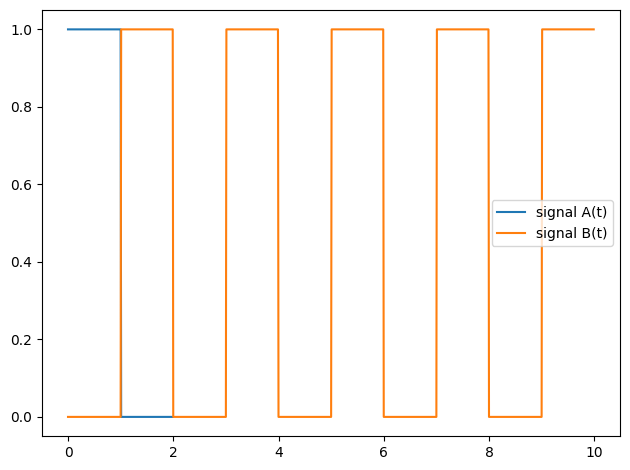

In [8]:
# A compléter
# Création des deux signaux

T = 2
Te=0.01

tA = np.arange(0,2,Te)
tB = np.arange(0,10,Te)

A = (tA<=1).astype(float)
B = (np.abs(tB%T)>T/2).astype(float)

plt.plot(tA,A,label='signal A(t)')
plt.plot(tB,B,label='signal B(t)')
plt.legend()
plt.tight_layout()
plt.show()

Testez maintenant votre fonction de corrélation sur vos deux signaux, et tracez le résultat obtenu en fonction des valeurs de $\tau$ possibles.

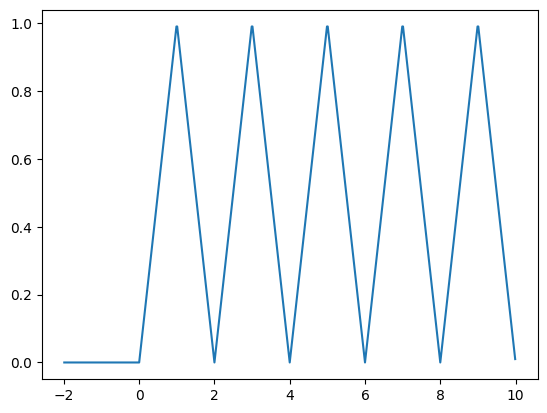

In [9]:
# A compléter
# Calcul de la corrélation entre A et B
tau_vals, A_B_correlation = correlation(A,B,Te)

plt.plot(tau_vals,A_B_correlation)
plt.show()

**_QUESTION :_** A quels instants la corrélation est maximum ? Qu'est-ce que cela signifie ?

In [10]:
# A compléter
# Récupération des valeurs de tau où la corrélation est maximum
max_correlation = A_B_correlation.max()
tau_max_correlation = tau_vals[A_B_correlation==max_correlation]
print(tau_max_correlation)

[0.99 1.   1.01 2.99 3.   3.01 4.99 5.   5.01 6.99 7.   7.01 8.99 9.
 9.01]


**_REPONSE :_** On retrouve des pics aux alentours de tau égal à 1, 3, 5, 7 et 9 secondes. Cela signifie que dans le signal $B$ ressemble le plus à $A$ à ces moments précis. Cela est cohérent, puisque notre signal B est construit à partir de $A$ avec un décalage de 1 secondes sur une période T = 2 secondes.

Vous pouvez maintenant comparer votre résultat de corrélation avec celui effectué par la fonction correlate de NumPy. Attention : la fonction fait le calcul inverse, donc il faut échanger vos signaux dans l'appel de la fonction, et utilise le mode 'full' pour avoir une corrélation à chaque indice (comme fait préalablement).

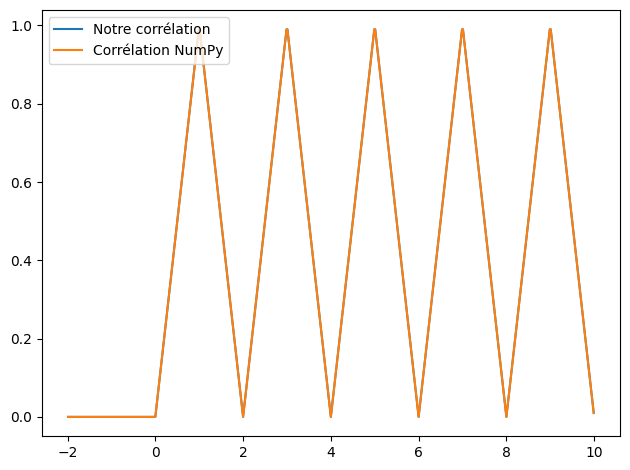

In [11]:
# A compléter
# Calcul de la corrélation entre A et B via la fonction correlate de NumPy
A_B_correlation_numpy = np.correlate(B,A,'full')*Te

# Affichage du résultat
# Ici, on réutilise tau_vals, car la fonction de NumPy n'a pas l'information du taux d'échantillonage
plt.plot(tau_vals,A_B_correlation,label='Notre corrélation')
plt.plot(tau_vals,A_B_correlation_numpy, label='Corrélation NumPy')
plt.legend()
plt.tight_layout()
plt.show()

Super, on a notre fonction de corrélation !

...

Cependant...

Notre fonction n'est en réalité pas très robuste. En effet, en ajoutant une seule valeur abberante, on peut complètement la casser ! (emoji choqué)

Reprenez votre signal B, et ajoutez une seule valeur aberrante (ex: à $t = 4.5$, $B(t)=100$). Recalculez la corrélation et affichez le résultat.

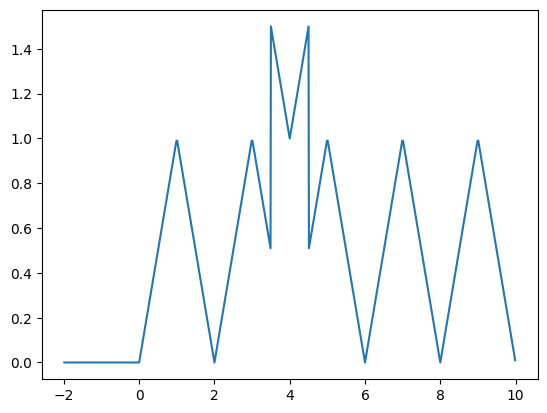

In [12]:
# A compléter
# Ajout d'une valeur aberrante à B(t)
B_bruite = B.copy()
B_bruite[tB==4.5]=100

# Calcul de la corrélation entre A et B avec la valeur aberrante
tau_vals, A_B_correlation_bruite = correlation(A,B_bruite,Te)

plt.plot(tau_vals,A_B_correlation_bruite)
plt.show()

Si vous avez bien codé, vous devriez avoir une courbe de corrélation toute chamboulée par ce désagrément. Cela est dû au fait que notre fonction de corrélation est ultra dépendante à l'amplitude. De ce fait, une amplitude grande donne de meilleurs scores sur le calcul de corrélation. Le soucis ici est qu'on cherche avant tout à détecter un motif, indépendamment de l'amplitude. Pour cela, nous allons modifier notre fonction afin d'éviter ce problème.

---

## Exercice 2 : ZNCC is the new correlation

Dans ce deuxième exercice, nous allons reprendre la fonction de corrélation pour faire une corrélation normalisée, appelée ZNCC (Zero-Mean Normalized Cross Correlation). La formule est quasi la même que celle que nous avons vu précédemment, à quelques détails prêts:

\begin{equation*}
ZNCC_{fg}(\tau) =\;
\frac{\displaystyle \sum_n \bigl(f(n + \tau) - \bar{f}\bigr)\,\bigl(g^{*}(n) - \bar{g}^{*}\bigr)}
     {\sqrt{\displaystyle \sum_n \bigl(f(n + \tau) - \bar{f}\bigr)^2}\;
      \sqrt{\displaystyle \sum_n \bigl(g^{*}(n) - \bar{g}^{*}\bigr)^2}}
\end{equation*}

Typiquement, ça reprend la formule de corrélation utilisée préalablement, avec les signaux $f$ et $g$ normalisés, c-à-d en soustrayant leur moyenne $\bar{f}$ et $\bar{g}^{*}$, puis en divisant le score de corrélation par la multiplication de leur norme L2. On remarque cependant que contrairement à la formule de la corrélation originale, ZNCC est indépendante du temps d'échantillonage $T_e$.

La difficulté ici est que le calcul des moyennes et des normes ne se font pas sur les signaux entiers, mais là où $f$ et $g$ se recoupent (leur intersection).

**_QUESTION :_** Sachant que $f$ et $g$ sont respectivement de taille $N$ et $M$, et qu'on applique un décalage $S$ (entier), à quels indices se trouvent l'intersection de $f$ et $g$ ?

*Note : Hormis si vous êtes des génies, faites un schéma sur papier svp (pas besoin de le scanner et de l'afficher sur le notebook). Sans schéma, c'est difficile à visualiser.*

**_REPONSE :_** Le signal $g$ évolue de 0 à $M$. Le signal $f$ évolue lui de $S$ à $N+S$, avec $S$ qui peut être positif ou négatif. De ce fait, l'index minimum de l'intersection est $max(0,S)$, et l'index maximum de l'intersection est $min(M-1,N+S-1)$.

Reprenez la fonction de calcul de score d'intercorrélation entre deux signaux à un retard $S$ (entier) fixé et modifiez-la pour en calculer le score de ZNCC. Pour cela, il faut, dans l'ordre :

- Récupérer les tailles des deux signaux $f$ et $g$
- Effectuer un padding sur les deux signaux pour qu'ils soient de même taille
- Décaler le signal $f$ de $S$ cases
- Coupez les signaux $f$ et $g^{*}$ à l'endroit de leur intersection
- Si la taille de l'intersection est trop petite (inférieure au quart du plus petit signal), renvoyer 0
- Calculer et retirer la moyenne des signaux $f$ et $g^{*}$
- Calculer le score d'intercorrélation entre les deux signaux, en suivant la fonction écrite préalablement
- Diviser ce score par la norme de $f$ et $g^{*}$

*Note : La norme de $f$ et de $g$ pouvant être nulles, dans le cas où l'une ou l'autre vaut zéro, il faut lui rajouter $\epsilon = 1e-12$ pour éviter une division par zéro* 

In [13]:
# Développement de la fonction de calcul du score d'intercorrélation entre deux signaux à décalage S fixé
def score_ZNCC(f,g,s):
    """
    Calcule le score de ZNCC entre le signal f retardé de s et le signal g 
    f, g : tableaux NumPy 1D, signaux à corréler
    s : entier, retard du signal f
    """
    
    # Padding des signaux pour qu'ils soient à la même taille
    len_f, len_g = len(f), len(g)
    f = padding(f,len_g)
    g = padding(g,len_f)
    
    # Décalage de f de S pas
    f_decale = shift(f,s)
    
    # On calcule la corrélation uniquement sur l'intersection entre les deux signaux dans le temps
    index_min = max(0,s)
    index_max = min(len_f+s,len_g)
    
    f_decale = f_decale[index_min:index_max]
    g = np.conjugate(g[index_min:index_max])

    # On renvoit 0 si la taille de l'intersection est inférieur
    if (len(f_decale)<min(len_f,len_g)/4):
        return 0

    # On retire la moyenne aux deux signaux
    f_decale -= np.mean(f_decale)
    g -= np.mean(g) 
    
    # On calcule le score de corrélation et on divise par les normes de g et f
    # Afin d'éviter que les normes de g et f soient à zéro et donc que le dénominateur soit nul, on place chaque norme au minimum à epsilon = 1e-12
    return np.dot(f_decale,g) / (max(np.linalg.norm(g),1e-12) * max(np.linalg.norm(f_decale),1e-12))

Reprenez votre fonction de calcul de corrélation qui prend en entrée $f$, $g$ et $T_e$. Modifiez-la pour qu'elle renvoit les valeurs de retards calculés en secondes et le score de ZNCC.

*Note : Il n'y a quasimment rien à changer, il faut juste changer le nom de la fonction et l'appel à une fonction...*

In [14]:
# A compléter
# Fonction de ZNCC entre les signaux f et g avec un pas d'échantillonage de Te
def ZNCC(f,g,Te):
       
    # Création du vecteur des différents shifts possibles où f et g ont un recouvrement
    S_vals = np.arange((-len(f)+1),len(g))
    
    # Calcul des retards tau possibles en fonction de S_vals et du pas d'échantillonage T_e
    tau_vals = S_vals * Te
       
    #for i in progressbar(range(len(tau_vals))):
    scores_corr = np.array([score_ZNCC(f,g,s) for s in S_vals])
        
    return tau_vals, scores_corr

Reprenez les signaux $A$ et $B$, calculez le score de ZNCC entre ces signaux et affichez le résultat.

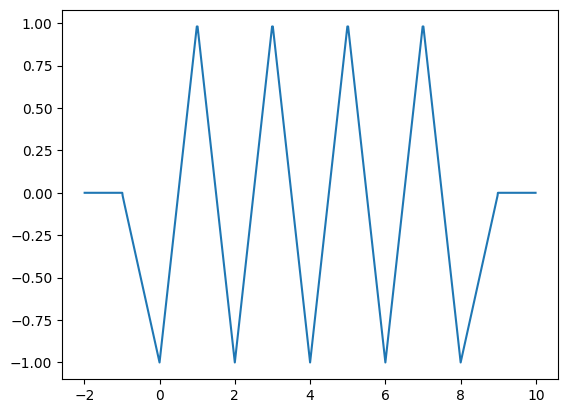

In [15]:
# A compléter
# Calcul de la corrélation entre A et B
tau_vals, A_B_ZNCC = ZNCC(A,B,Te)

plt.plot(tau_vals,A_B_ZNCC)
plt.show()

**_QUESTION :_** 
- Dans quel intervalle est inclut le score de ZNCC ?
- A quels instants ZNCC est maximum ? 
- A quels instants ZNCC est minimum ? 
- Qu'est-ce que cela signifie ?

In [16]:
# A compléter
# Récupération des valeurs de tau où la corrélation est maximum
max_ZNCC = A_B_ZNCC.max()
tau_max_ZNCC = tau_vals[A_B_ZNCC==max_ZNCC]
print(tau_max_ZNCC)

# Récupération des valeurs de tau où la corrélation est minimum
min_ZNCC = A_B_ZNCC.min()
tau_min_ZNCC = tau_vals[A_B_ZNCC==min_ZNCC]
print(tau_min_ZNCC)

[1. 3. 5. 7.]
[0. 2. 4. 6. 8.]


**_REPONSE :_** Le score de ZNCC est en réalité un coefficient inclut dans l'intervalle $[-1,1]$:
- Lorsque le score est à 1 (ici, à 1, 3, 5 et 7 secondes), les deux signaux sont identiques à une mise à l’échelle près.
- Lorsque le score est à 0, il n'y a aucune corrélation entre les deux signaux
- Lorsque le score est à -1 (ici, à 0, 2, 4, 6 et 8 secondes), les deux signaux correspondent parfaitement, mais inversés.

Reprenez maintenant le signal bruité $B$, comme fait précédemment, calculez le ZNCC entre $A$ et $B$ bruité, et affichez le résultat.

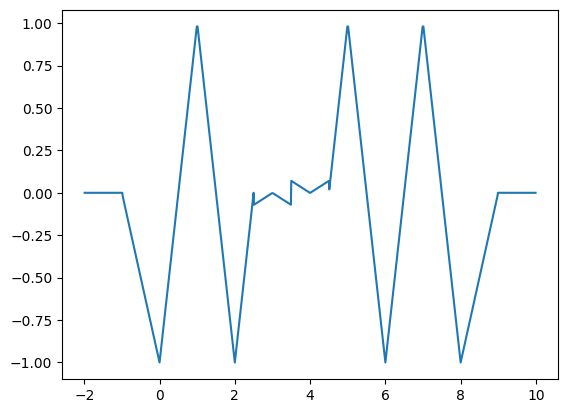

In [17]:
# A compléter
# Calcul de ZNCC entre A et B avec la valeur aberrante
tau_vals, A_B_ZNCC_bruite = ZNCC(A,B_bruite,Te)

plt.plot(tau_vals,A_B_ZNCC_bruite)
plt.show()

**_QUESTION :_** Que remarquez-vous ?

**_REPONSE :_** La valeur aberrante ici ne perturbe pas le calcul de ZNCC, même si elle casse une possible corrélation pour $\tau$ à 3 secondes.

En conclusion, ZNCC est plus robuste car insensible à l'amplitude du signal. Avec ZNCC, on cherche avant tout un motif, qu'il soit fort, faible, ou même inversé. Malheureusement, ZNCC n'est pas disponible dans une librairie Python (je suis surpris comme vous), du moins pas sous la forme qu'on souhaite pour le traitement du signal.

---

## Exercice 3 : Où est caché DJ Khaled ?

Grâce à votre superbe fonction ZNCC, vous pouvez trouver n'importe quel pattern dans un signal. Dans la série des patterns reconnaissables, on peut citer les tags audios des producteurs de musique, qui est l'équivalent d'une signature généralement au début du morceau. Parmi les tags audios célèbres, DJ Khaled en a plusieurs, dont son fameux "Another One".

Dans cet exercice, l'objectif est simple: à partir du tag audio de DJ Khaled, à vous de retrouver dans la bibliothèque audio quel son a été produit par lui.

*Note : En écoutant les WAV, vous pourrez remarquer que la qualité n'est pas terrible. C'est normal : la fréquence d'échantillonage a été fortement diminuée, afin de réduire drastiquement le temps de calcul...*

In [18]:
import IPython

IPython.display.Audio('tag.wav')

Dans un premier temps, chargez le fichier audio tag.wav. Pour cela, vous avez la fonction *read* du module *wavfile* du package *scipy.io*.

In [19]:
# A compléter
# Chargement de l'extrait audio
from scipy.io import wavfile

freq_tag, extrait_tag = wavfile.read("tag.wav")

print(f"Fréquence d'échantillonage du tag audio : {freq_tag} Hz")

Fréquence d'échantillonage du tag audio : 8000 Hz


**_QUESTION :_** Que renvoit la fonction *read* à la lecture du fichier WAV ?

**_REPONSE :_** Le fichier renvoit la fréquence d'échantillonage du fichier audio, et le signal.

Tracez le signal du tag audio, en reconstruisant l'axe temporel préalablement.

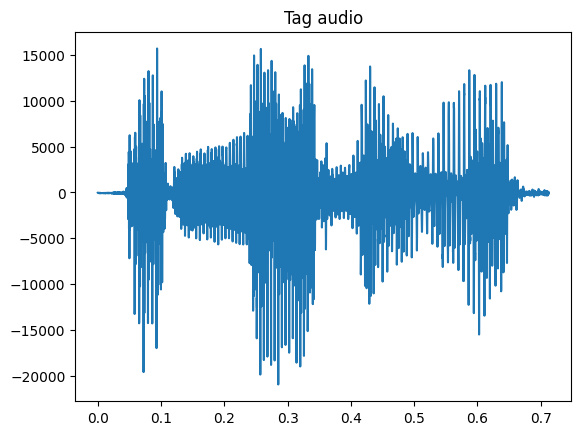

In [20]:
# A compléter
# Reconstruction de l'axe temporel
t_extrait_tag = np.arange(0, len(extrait_tag)/freq_tag, 1/freq_tag)

# Tracé du signal audio
plt.plot(t_extrait_tag, extrait_tag)
plt.title("Tag audio")
plt.show()

Faites de même avec le fichier *music_1.wav*. Chargez-le, reconstruisez l'axe temporel de la musique et tracez le signal.

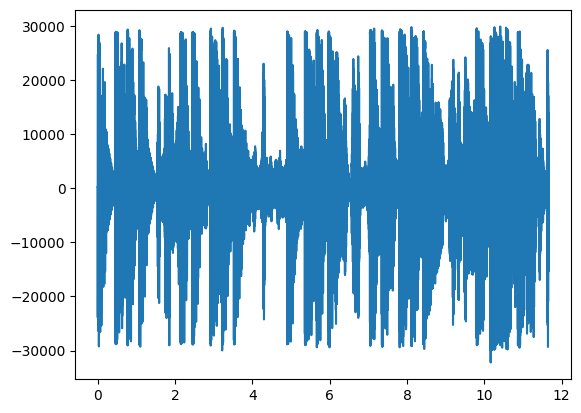

In [21]:
# A compléter
# Chargement de l'extrait audio music_1
freq_musique, extrait_musique = wavfile.read("music_1.wav")

# Reconstruction de l'axe temporel
t_musique = np.arange(0,len(extrait_musique)/freq_musique, 1/freq_musique)

# Affichage du signal
plt.plot(t_musique,extrait_musique)
plt.show()

Appliquez votre fameux algorithme ZNCC pour le tag audio et l'extrait musical, et affichez le résultat.

*Note : le temps de calcul peut être long, vu la taille du signal... Et encore, ce n'est qu'un extrait de musique...*

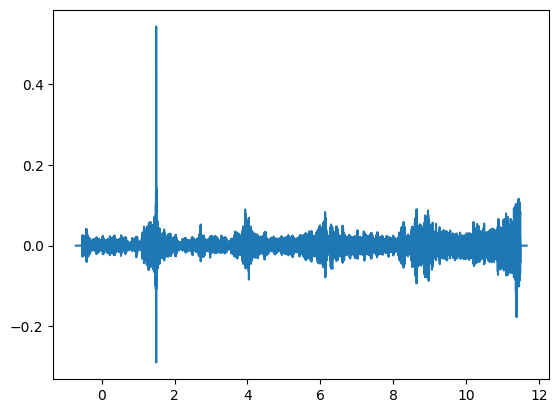

In [22]:
# A compléter
# Calcul de ZNCC pour le tag audio et l'extrait musical
tau_vals, ZNCC_music_1 = ZNCC(extrait_tag.astype(float),extrait_musique.astype(float),1/freq_tag)

# Affichage du score ZNCC en fonction du retard tau
plt.plot(tau_vals,ZNCC_music_1)
plt.show()

Si tout est ok, il devrait y avoir un pic qui ressort ! Récupérez la valeur de $\tau$ où ZNCC est maximum.

In [23]:
# A compléter
# Récupération du tau optimal
best_tau = tau_vals[ZNCC_music_1.argmax()]
print(f"Tau optimal : {best_tau}")

Tau optimal : 1.4953750000000001


Coupez music_1 de manière à avoir l'extrait où vous avez le meilleur score ZNCC (à partir du $\tau$ optimal)

In [24]:
# A compléter
# Extraction de l'audio avec le meilleur score ZNCC
indice_tau_t_musique = np.argwhere(t_musique==best_tau)[0][0]
best_extrait_music_1 = extrait_musique[indice_tau_t_musique:indice_tau_t_musique+len(t_extrait_tag)]

Exportez dans un nouveau fichier WAV l'audio du meilleur extrait trouvé via la fonction *write* du module *wavfile* du package *scipy.io*

In [25]:
# A compléter
# Export du meilleur extrait en fichier WAV
wavfile.write("best_extrait_music_1.wav",freq_musique,best_extrait_music_1)

**_QUESTION :_** Alors, est-ce que l'extrait trouvé est pertinent ?

In [26]:
IPython.display.Audio('best_extrait_music_1.wav')

**_REPONSE :_** OUI !

Vous pouvez maintenant continuer votre recherche avec les autres audios. Ecrivez pour finir les extraits audios où vous avez trouvé le tag.

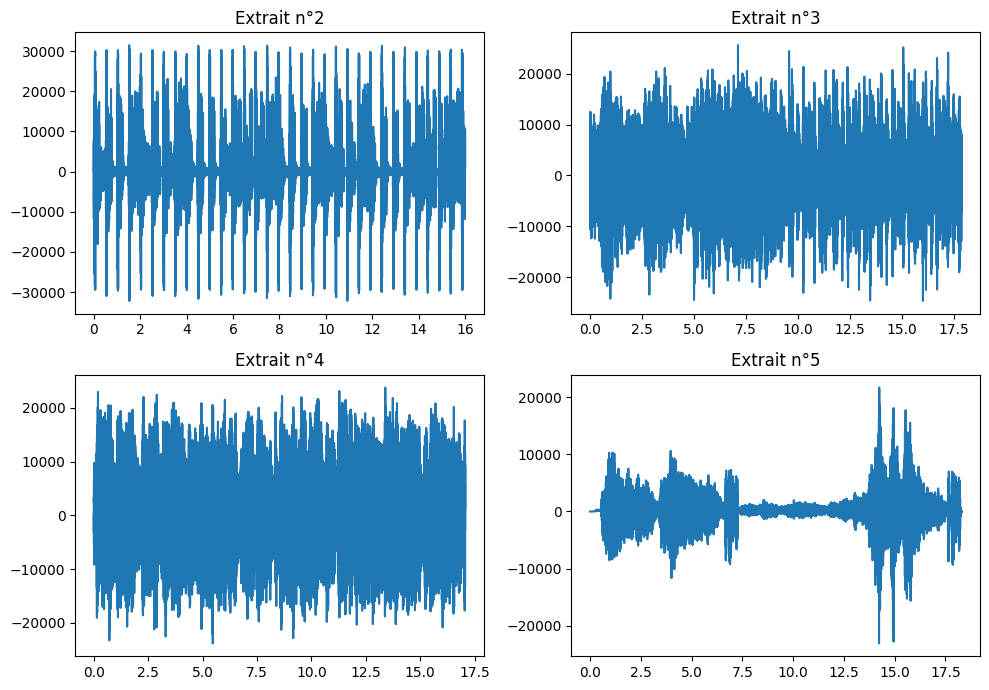

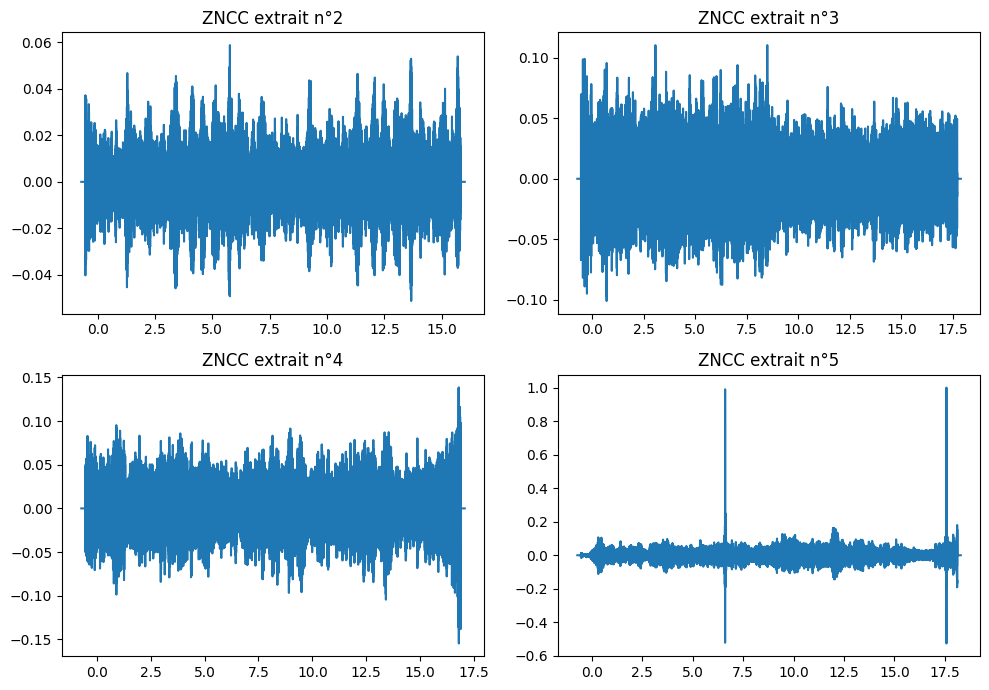

In [27]:
# A compléter
# Chargement des extraits audios
freq_musique_2, extrait_musique_2 = wavfile.read("music_2.wav")
freq_musique_3, extrait_musique_3 = wavfile.read("music_3.wav")
freq_musique_4, extrait_musique_4 = wavfile.read("music_4.wav")
freq_musique_5, extrait_musique_5 = wavfile.read("music_5.wav")

# Reconstruction des axes temporels
t_musique_2 = np.arange(0,len(extrait_musique_2)/freq_musique_2, 1/freq_musique_2)
t_musique_3 = np.arange(0,len(extrait_musique_3)/freq_musique_3, 1/freq_musique_3)
t_musique_4 = np.arange(0,len(extrait_musique_4)/freq_musique_4, 1/freq_musique_4)
t_musique_5 = np.arange(0,len(extrait_musique_5)/freq_musique_5, 1/freq_musique_5)

# Affichage des signaux
plt.subplots(2,2,figsize=(10,7))
plt.subplot(221)
plt.plot(t_musique_2,extrait_musique_2)
plt.title("Extrait n°2")
plt.subplot(222)
plt.plot(t_musique_3,extrait_musique_3)
plt.title("Extrait n°3")
plt.subplot(223)
plt.plot(t_musique_4,extrait_musique_4)
plt.title("Extrait n°4")
plt.subplot(224)
plt.plot(t_musique_5,extrait_musique_5)
plt.title("Extrait n°5")
plt.tight_layout()
plt.show()

# Calcul de ZNCC pour le tag audio et les différents extraits musicaux (assez long...)
tau_vals_2, ZNCC_music_2 = ZNCC(extrait_tag.astype(float),extrait_musique_2.astype(float),1/freq_tag)
tau_vals_3, ZNCC_music_3 = ZNCC(extrait_tag.astype(float),extrait_musique_3.astype(float),1/freq_tag)
tau_vals_4, ZNCC_music_4 = ZNCC(extrait_tag.astype(float),extrait_musique_4.astype(float),1/freq_tag)
tau_vals_5, ZNCC_music_5 = ZNCC(extrait_tag.astype(float),extrait_musique_5.astype(float),1/freq_tag)

# Affichage des scores ZNCC en fonction du retard tau
plt.subplots(2,2,figsize=(10,7))
plt.subplot(221)
plt.plot(tau_vals_2,ZNCC_music_2)
plt.title("ZNCC extrait n°2")
plt.subplot(222)
plt.plot(tau_vals_3,ZNCC_music_3)
plt.title("ZNCC extrait n°3")
plt.subplot(223)
plt.plot(tau_vals_4,ZNCC_music_4)
plt.title("ZNCC extrait n°4")
plt.subplot(224)
plt.plot(tau_vals_5,ZNCC_music_5)
plt.title("ZNCC extrait n°5")
plt.tight_layout()
plt.show()


On remarque que sur les extraits 2, 3 et 4, il n'y a aucun score ZNCC très haut ou très bas. On ne détecte donc pas le tag audio dans ces extraits. En revanche, dans l'extrait 5, on voit deux très hauts pics positifs, indiquant qu'il y aurait possiblement deux fois le même tag audio. Et à l'écoute, cela peut paraître surprenant, mais c'est le cas. Beethoven ft DJ Khaled, la collab que personne n'attendait...